In [1]:
import tensorflow as tf
import  matplotlib.pyplot as plt
import random

In [2]:

# CıFAR-10 popüler bir veri seti. 
# Toplamda 60 bin adet resim var 10 sınıfa ait

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Etiketler vektör olmalı yani tek boyuta sahip olmalı.
# Etiketleri tek boyuta düşürüyoruz
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
# resimlerin boyutu 50000,32,32,3 olarak çıktı verecek
# Burada 50 bin örnek sayısı. Yani kaç tane resim olduğu
# 32,32 bir resmin boyutu
# 3 ise resmin kanal sayısı

print("Resimlerin boyutu:", x_train.shape)
print("Etiketlerin boyutu:", y_train.shape)
print("Test Resimlerinin boyutu:", x_test.shape)

Resimlerin boyutu: (50000, 32, 32, 3)
Etiketlerin boyutu: (50000,)
Test Resimlerinin boyutu: (10000, 32, 32, 3)


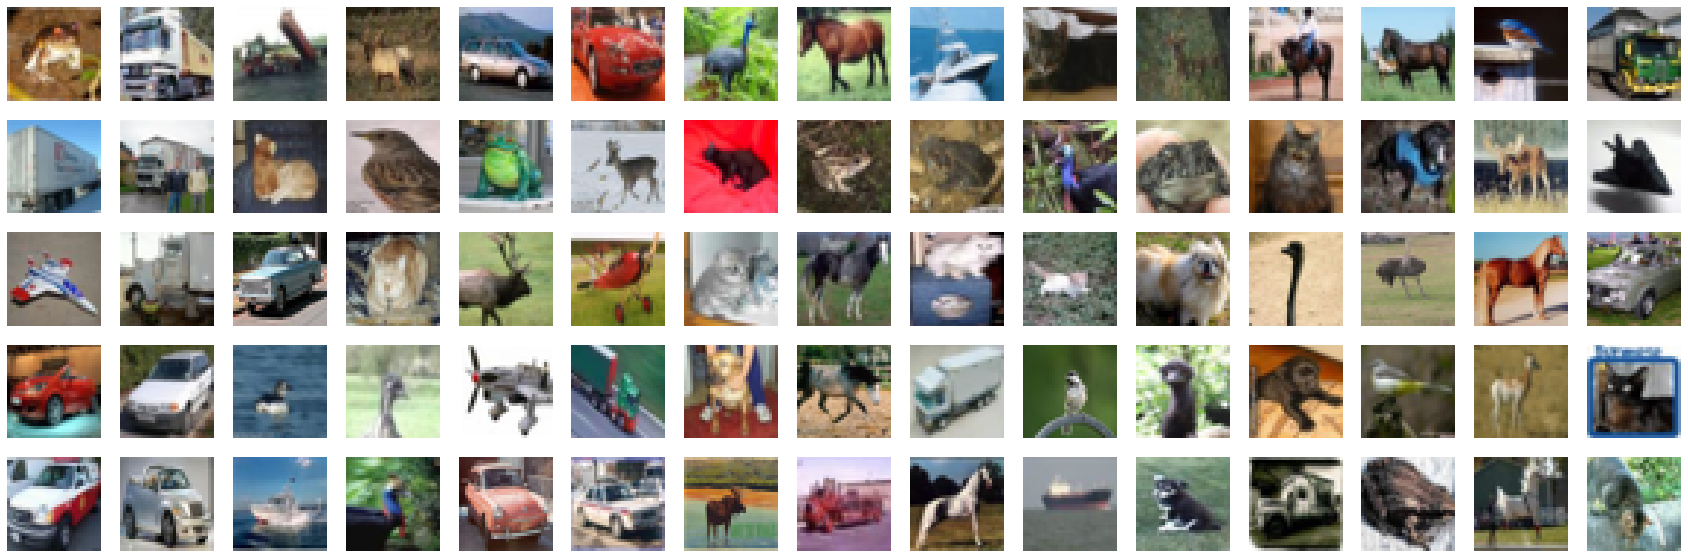

In [3]:
fig = plt.figure(figsize=(30,10))
for i in range(75):

    plt.subplot(5, 15, i+1)

    plt.imshow(x_train[i])
    
    plt.axis('off')

plt.show()

In [4]:

model = tf.keras.models.Sequential([
  # Burada evrişim katmanı kullanıyoruz. Genelde resimlerde kullanılır
  # 64 filtre sayısı. 3,3 evrişim yapan filtrenin boyutu.
  # aktivasyon fonksiyonu relu. input shape  her bir resmin boyutu
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
  # Max pooling katmanı. kendisine verilen verileri 2*2 şeklinde gruplayıp
  # bu gruptaki en büyük elemanı alıp yeni bir veri oluşturuyor.
  # Kendisine verilen resim 30*30 boyutunda ise o bunu 15*15 yapar
  tf.keras.layers.MaxPooling2D(2, 2),
  # Filtre sayısı 128
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Filtre sayısı 256  
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Veriyi düzleştirdik  
  tf.keras.layers.Flatten(),
  # 512 nörona sahip bir katman  
  tf.keras.layers.Dense(512, activation='relu'),
  # Her bir epoch'ta bir önceki katmandaki(512 nöronlu olan) nöronların
  # %20'sini rastgele iptal ediyoruz.   
  tf.keras.layers.Dropout(0.2),
  # Son katman. 10 nöron var çünkü sınıf sayısı 10
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:

ann_model2 = tf.keras.models.Sequential([

  tf.keras.layers.Flatten(input_shape=(32, 32,3)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(25, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

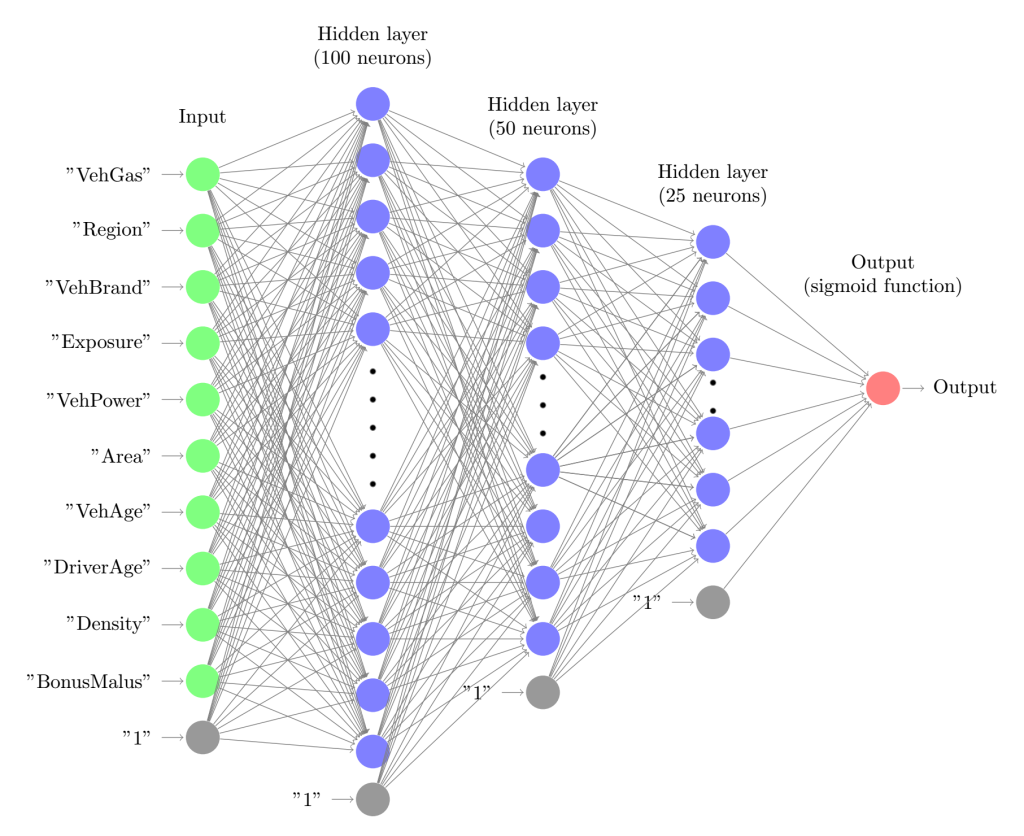

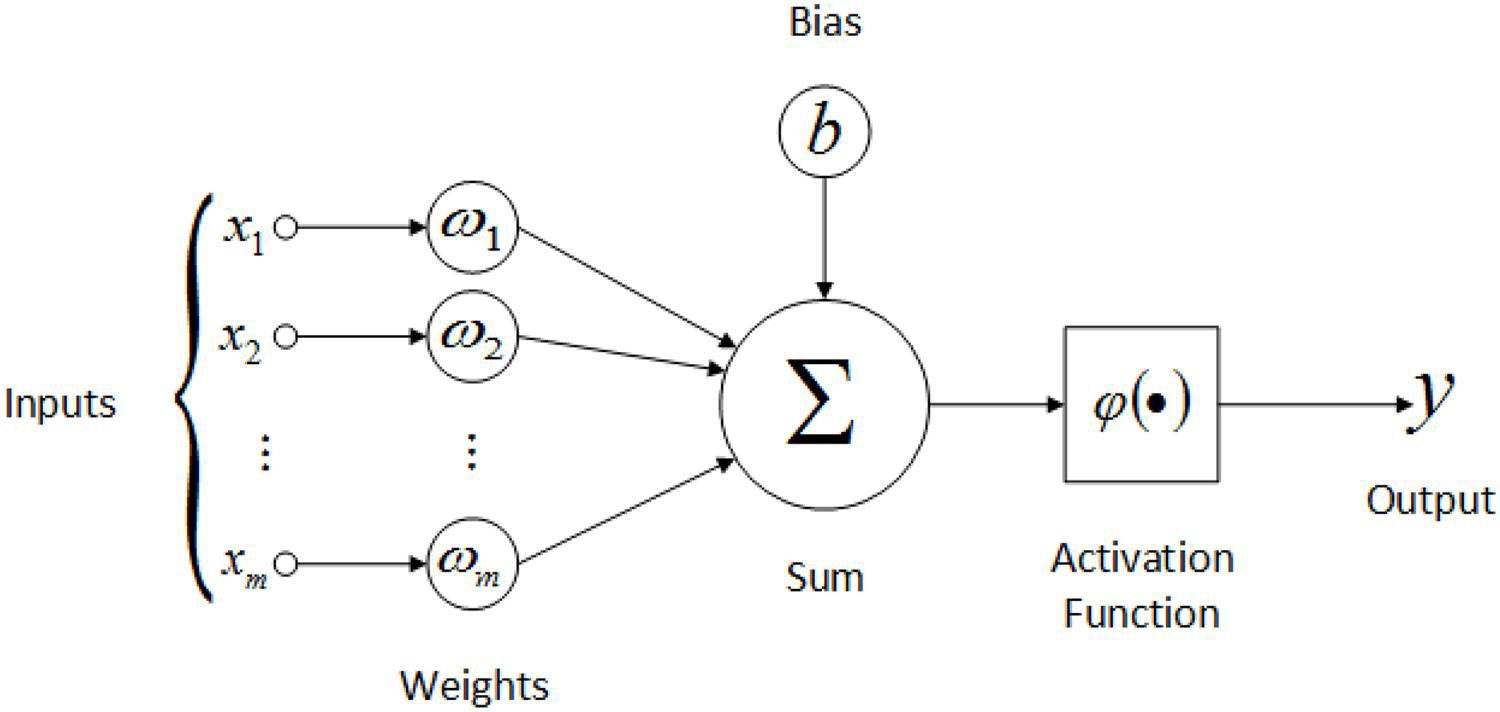

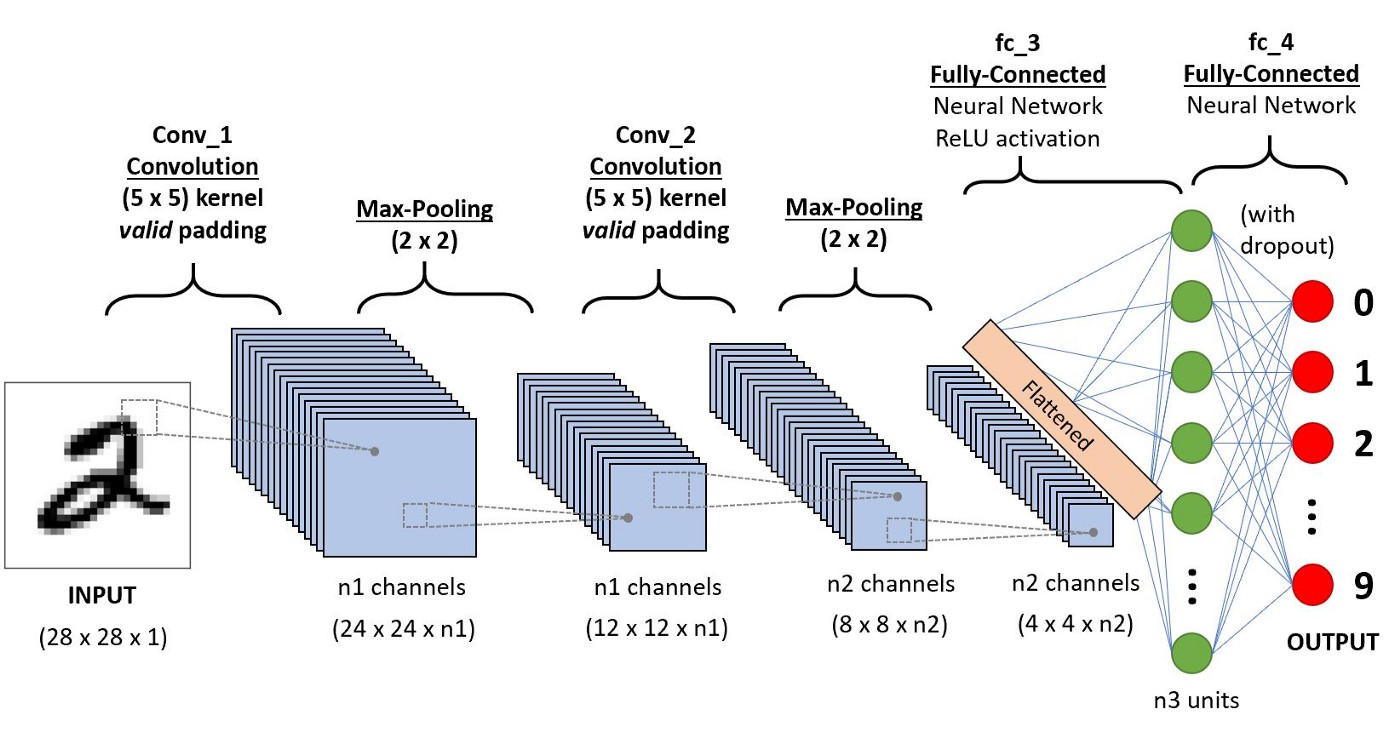

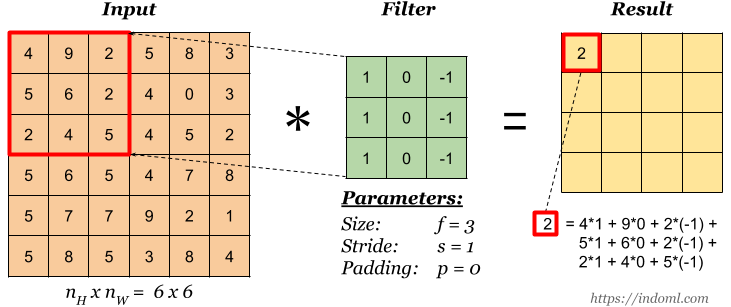

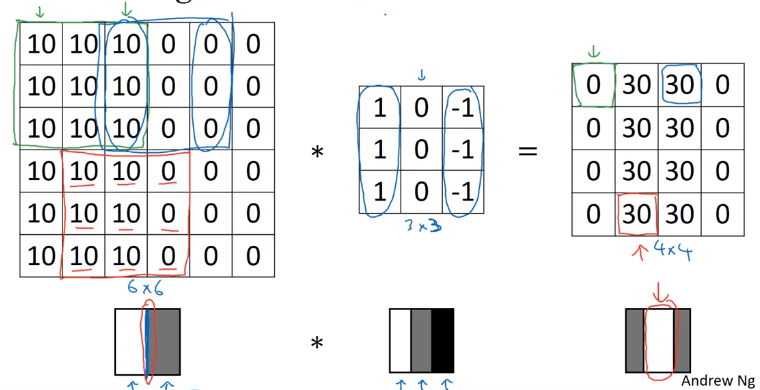

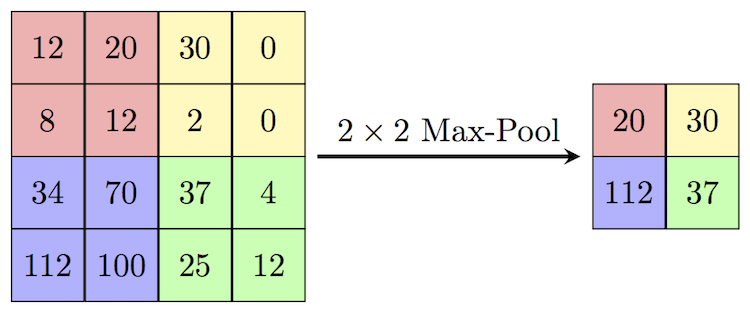

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

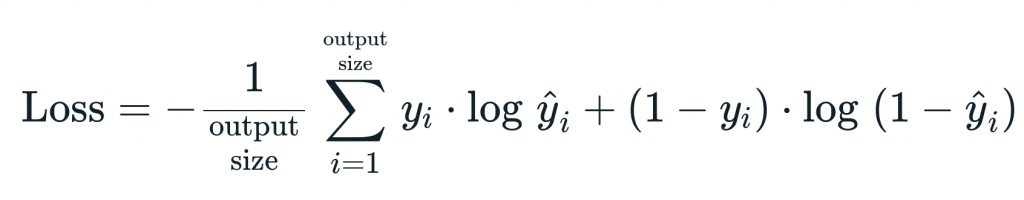

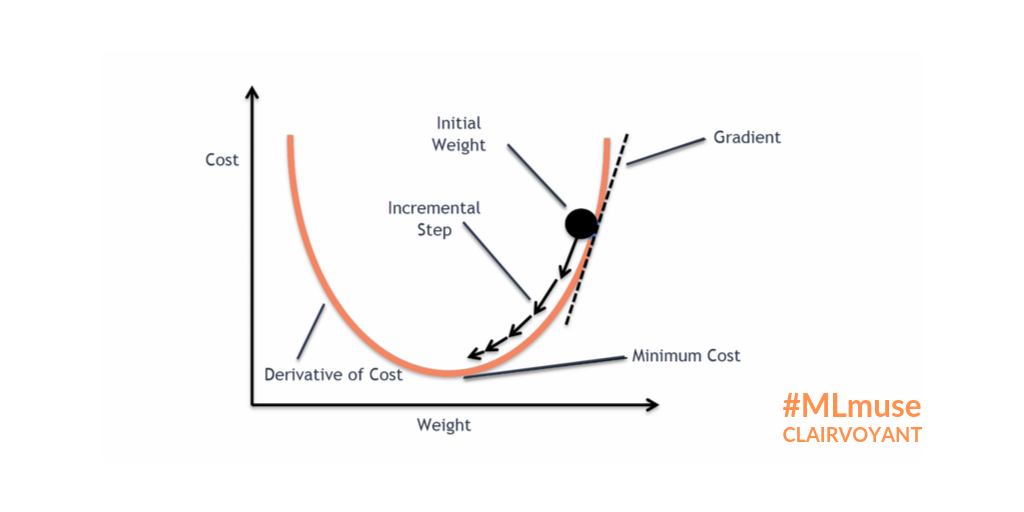

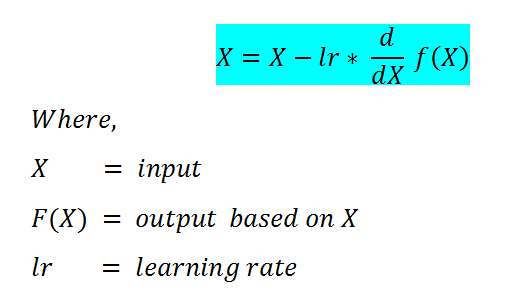

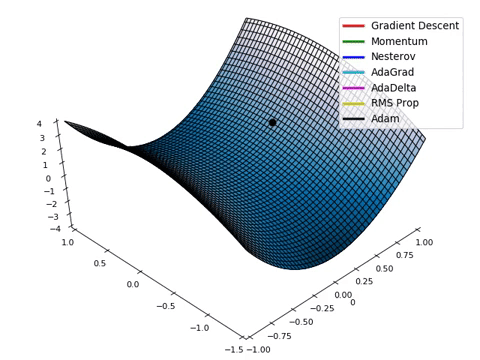

In [7]:
r = model.fit(x_train, y_train, 
              validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 70s 21ms/step - loss: 1.4731 - accuracy: 0.4616 - val_loss: 1.1842 - val_accuracy: 0.5785
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0819 - accuracy: 0.6182 - val_loss: 1.0375 - val_accuracy: 0.6444
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9093 - accuracy: 0.6802 - val_loss: 0.8922 - val_accuracy: 0.6926
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7879 - accuracy: 0.7245 - val_loss: 0.8579 - val_accuracy: 0.7103
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6989 - accuracy: 0.7534 - val_loss: 0.8654 - val_accuracy: 0.7098
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6253 - accuracy: 0.7809 - val_loss: 0.8547 - val_accuracy: 0.7151
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.5449 - accuracy: 0.8077 - val_loss: 0.8447 -

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9621 - accuracy: 0.7252


[0.9621318578720093, 0.7251999974250793]

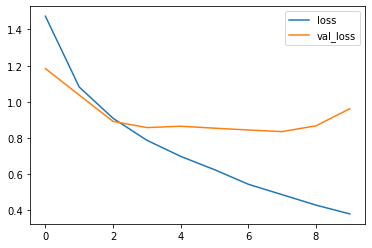

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

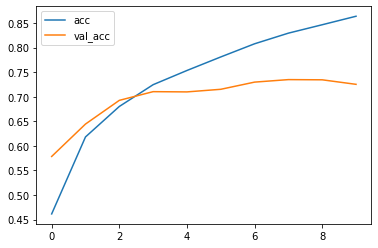

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [11]:
y_predict=model.predict(x_test).argmax(axis=1)

In [12]:
etiket = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

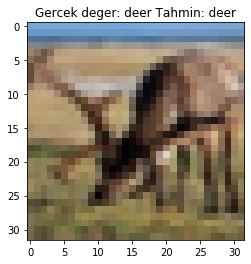

In [15]:
# Burada veri setindeki rastgele bir değerin
# gerçek değerini ve modelin tahmşn ettiği değeri
# kıyaslayıp veriyi gösteriyoruz.
i=random.randint(0, 9999)

plt.imshow(x_test[i])
# Rastgele Verinin gerçek adı
l1=etiket[y_test[i]]
# Rastgele verinin modelin tahmin ettiği adı
l2=etiket[y_predict[i]]
plt.title("Gercek deger: %s Tahmin: %s" % (l1,l2));